## Customer Shopping Trends Dataset

📌 Customer ID - Unique identifier for each customer.

📌 Age - Age of the customer.

📌 Gender - Gender of the customer (Male/Female).

📌 Item Purchased - The item purchased by the customer.

📌 Category - Category of the item purchased.

📌 Purchase Amount (USD) - The amount of the purchase in USD.

📌 Location - Location where the purchase was made.

📌 Size - Size of the purchased item.

📌 Color - Color of the purchased item.

📌 Season - Season during which the purchase was made.

📌 Review Rating - Rating given by the customer for the purchased item.

📌 Subscription Status - Indicates if the customer has a subscription (Yes/No).

📌 Shipping Type - Type of shipping chosen by the customer.

📌 Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).

📌 Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).

📌 Previous Purchases - Number of previous purchases made by the customer.

📌 Payment Method - Customer's most preferred payment method.

📌 Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

In [32]:
import pandas as pd
import re
import datetime
import seaborn as sns
#from sklearn import preprocessing
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_origin = pd.read_csv("shopping_trends.csv")
df = df_origin.copy()
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


## Checking the number of Columns in the Dataset

In [36]:
df.drop(columns='Customer ID',inplace=True)

In [37]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [39]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


 # Dataset information

 * Check Missing values
 * Check Dublicates
 * Check data type
 * Check the number of unique values of each column

In [40]:
df.shape
df.isnull().sum()    # there is not missing values
df.duplicated().sum() # there is not duplicated
df.dtypes


Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [41]:
df.nunique()

Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Payment Method               6
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Preferred Payment Method     6
Frequency of Purchases       7
dtype: int64

In [42]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.value_counts()

Age  Purchase Amount (USD)  Review Rating  Previous Purchases
32   32                     2.9            41                    2
68   75                     4.7            5                     2
18   22                     2.9            16                    1
53   72                     4.9            25                    1
     63                     2.9            18                    1
                                                                ..
35   94                     3.3            9                     1
                            4.2            31                    1
     95                     2.6            24                    1
                            4.0            40                    1
70   99                     4.6            48                    1
Name: count, Length: 3898, dtype: int64

In [43]:
categoric_df=df.select_dtypes(include=["object"])
categoric_df

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,No,Cash,2-Day Shipping,No,No,Venmo,Weekly
3896,Female,Backpack,Accessories,Iowa,L,White,Spring,No,PayPal,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3897,Female,Belt,Accessories,New Jersey,L,Green,Spring,No,Credit Card,Standard,No,No,Venmo,Quarterly
3898,Female,Shoes,Footwear,Minnesota,S,Brown,Summer,No,PayPal,Express,No,No,Venmo,Weekly


In [ ]:
# numeric_df.value_counts().plot.barh()

# categoric_df.value_counts().plot.barh()

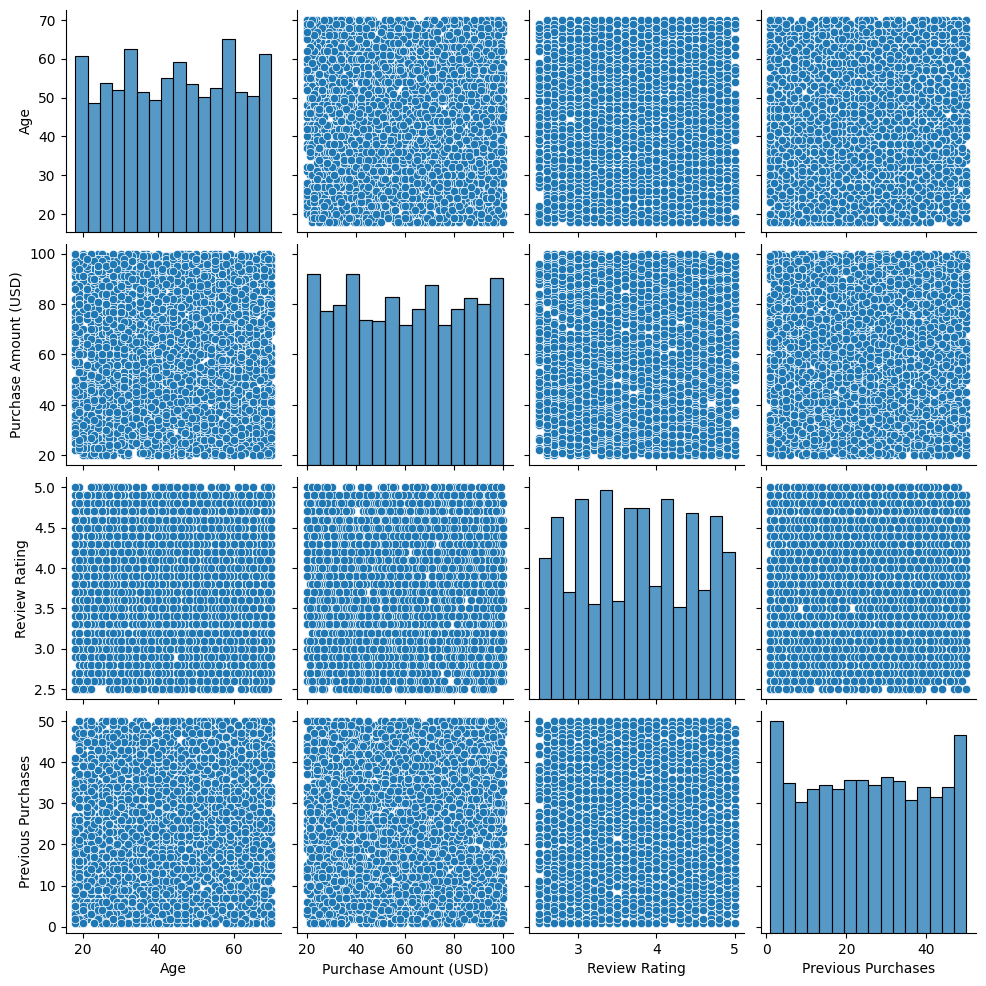

In [44]:
sns.pairplot(df)

<Axes: >

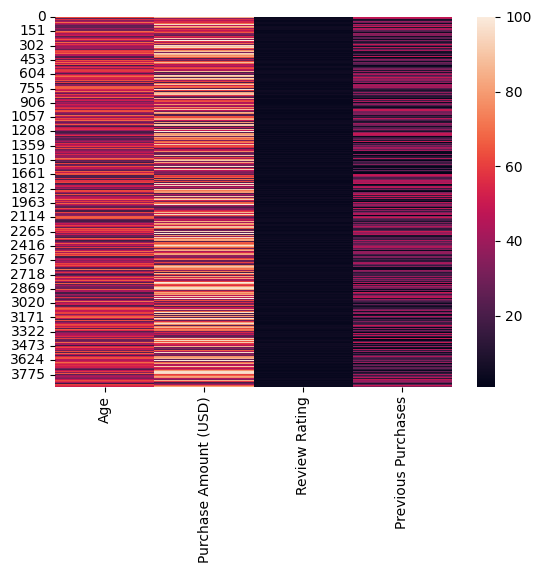

In [45]:
sns.heatmap(numeric_df)